In [141]:
import pandas as pd
import seaborn as sns # visualisation
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
sns.set() 
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [143]:
spambase_df=pd.read_csv("spambase.csv")


In [145]:
spambase_df.shape

(4601, 59)

In [155]:
print(spambase_df.columns)

Index(['Unnamed: 0', 'word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq

In [165]:
target = 'spam'
labels = ['Ham','Spam']
features = [i for i in spambase_df.columns.values if i not in [target]]

spambase_df = spambase_df.copy(deep=True)
spambase_df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [163]:
spambase_df.tail()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
4596,4596,0.31,0.0,0.62,0.0,0,0.31,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,False
4597,4597,0.00,0.0,0.00,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,False
4598,4598,0.30,0.0,0.30,0.0,0,0.00,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,False
4599,4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,False
4600,4600,0.00,0.0,0.65,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,False


In [7]:
#Use include=object inside the describe function for categorical variables ( size, number of attributes):

spambase_df.describe(include=object)

,word_freq_our,word_freq_000,word_freq_hpl,word_freq_labs
count,4601,4601,4601,4351
unique,256,165,282,180
top,0,0,0,0
freq,2852,3921,3789,3881


## This Dataset Spame consists 4601 samples, 0 to 4600 and 59 features

In [168]:
#To obtain information on the dataset, we need to use the info() method:
spambase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [170]:
spambase_df.isnull().sum() # In Order to find missing values 

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [172]:
# Check for missing values
missing_counts = spambase_df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)

Missing values in each column:
Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650    

In [174]:
#As we have a data that contains a lot of variabless, namely 4601 samples, 0 to 4600 and 59 features). 
#I decided to replace variable that has more than 100 elements. Since according to machine learning principe if missing valuse is less 
#than 20% it allows to drop them. 

missing_value_formats = ['none','no','n.a.','???','NA','n/a', 'na', '--', 'nan', 'NaN']
spambase_df = pd.read_csv('spambase.csv', na_values = missing_value_formats)

spambase_df ['word_freq_labs'].replace(to_replace = np.nan, value = 0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4596    0.0
4597    0.0
4598    0.0
4599    0.0
4600    0.0
Name: word_freq_labs, Length: 4601, dtype: float64

In [176]:
spambase_df

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,False
4597,4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,False
4598,4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,False
4599,4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,False


In [178]:
# For dropping missing values 

spambase_df = spambase_df.dropna (axis=0)
spambase_df



,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
250,250,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,2.500,21,130,True
251,251,0.00,0.00,0.00,0.0,0.00,2.30,0.00,0.00,0.00,...,0.000,0.829,0.000,2.766,0.829,0.000,5.607,25,157,True
252,252,0.08,0.16,0.32,0.0,1.38,0.16,0.08,0.00,0.24,...,0.000,0.085,0.061,0.390,0.097,0.012,5.594,119,1561,True
253,253,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,...,0.000,0.105,0.000,0.750,0.305,0.000,3.401,94,966,True
254,254,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,...,0.000,0.105,0.000,0.750,0.305,0.000,3.401,94,966,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,...,0.000,0.232,0.000,0.000,0.000,0.000,1.142,3,88,False
4597,4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.353,0.000,0.000,1.555,4,14,False
4598,4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.000,0.000,0.000,0.000,1.404,6,118,False
4599,4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.057,0.000,0.000,0.000,0.000,1.147,5,78,False


In [180]:
spambase_df=spambase_df.iloc[:,1:]
spambase_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
250,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,2.500,21,130,True
251,0.00,0.00,0.00,0.0,0.00,2.30,0.00,0.00,0.00,0.00,...,0.000,0.829,0.000,2.766,0.829,0.000,5.607,25,157,True
252,0.08,0.16,0.32,0.0,1.38,0.16,0.08,0.00,0.24,0.08,...,0.000,0.085,0.061,0.390,0.097,0.012,5.594,119,1561,True
253,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,0.97,...,0.000,0.105,0.000,0.750,0.305,0.000,3.401,94,966,True
254,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,0.97,...,0.000,0.105,0.000,0.750,0.305,0.000,3.401,94,966,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.000,0.000,0.000,0.000,1.142,3,88,False
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.353,0.000,0.000,1.555,4,14,False
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.000,0.000,0.000,0.000,1.404,6,118,False
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.000,0.000,0.000,0.000,1.147,5,78,False


In [182]:
print(spambase_df.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [184]:
false_values = spambase_df['is_spam'] == 0
print("spam", false_values)

spam 250     False
251     False
252     False
253     False
254     False
        ...  
4596     True
4597     True
4598     True
4599     True
4600     True
Name: is_spam, Length: 4273, dtype: bool


# Exploring Data Analysis (EDA) visualization (plural)
 

In [187]:
spambase_df.describe()
spambase_df.shape

(4273, 58)

In [189]:
# Replace categorical variables to numeric values and change of format for month column

spambase_df["is_spam"] = spambase_df["is_spam"].map({True:1, False:0})


In [191]:
spambase_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
250,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,2.500,21,130,1
251,0.00,0.00,0.00,0.0,0.00,2.30,0.00,0.00,0.00,0.00,...,0.0,0.829,0.000,2.766,0.829,0.000,5.607,25,157,1
252,0.08,0.16,0.32,0.0,1.38,0.16,0.08,0.00,0.24,0.08,...,0.0,0.085,0.061,0.390,0.097,0.012,5.594,119,1561,1
253,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,0.97,...,0.0,0.105,0.000,0.750,0.305,0.000,3.401,94,966,1
254,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,0.97,...,0.0,0.105,0.000,0.750,0.305,0.000,3.401,94,966,1


In [292]:
# using median
spambase_df["is_spam"].fillna(spambase_df["is_spam"].median())

250     1
251     1
252     1
253     1
254     1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: is_spam, Length: 3914, dtype: int64

In [300]:
# To check are there rows dublicates 

duplicate_rows_spambase_df = spambase_df[spambase_df.duplicated()]
print('number of duplicate rows:', duplicate_rows_spambase_df.shape)


number of duplicate rows: (0, 58)


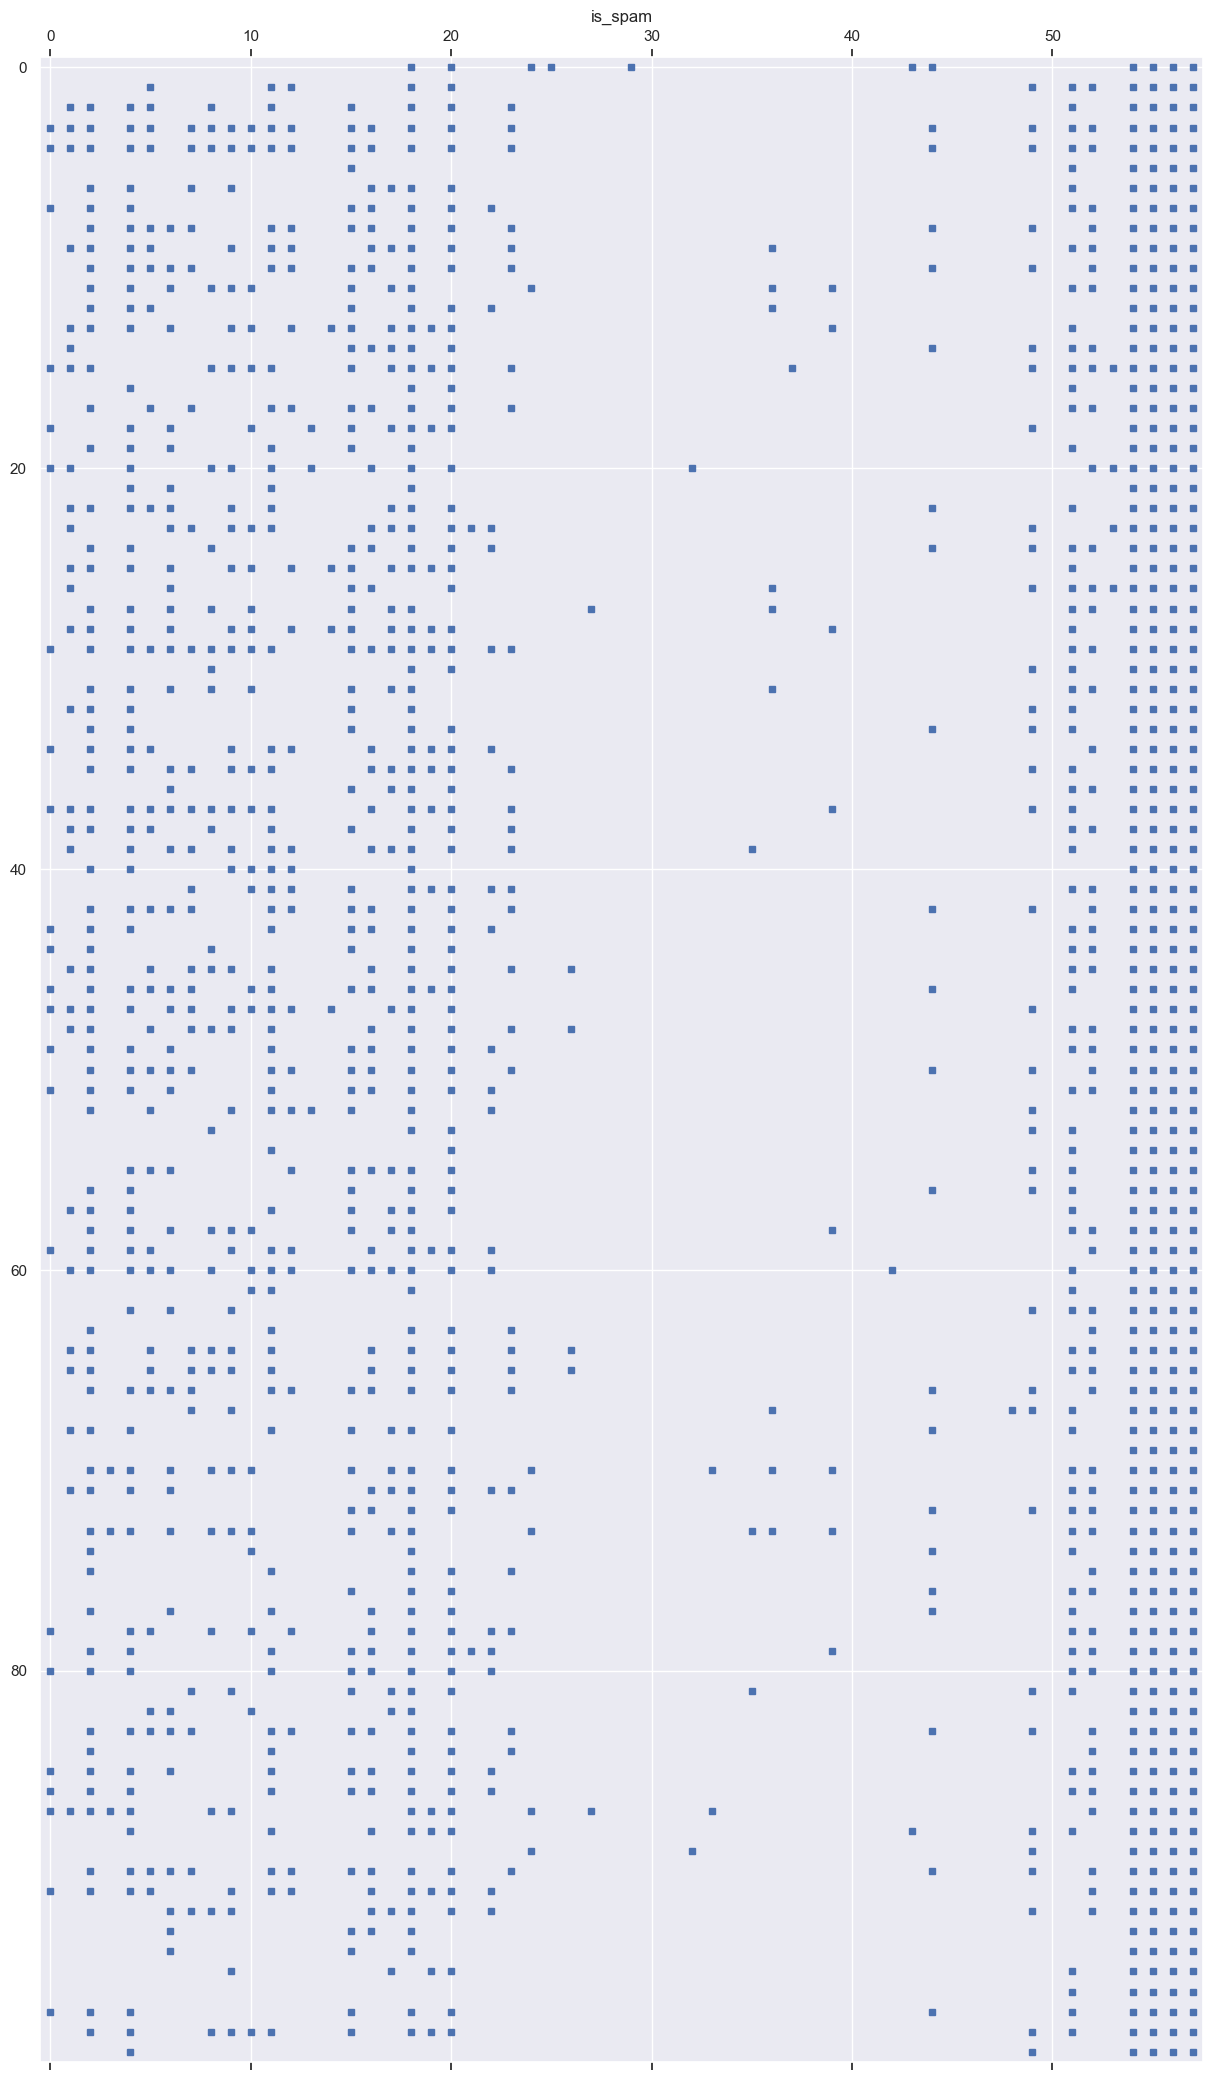

In [304]:
# For Visualising the Sparse Matrix

plt.figure(figsize=[15,30])
plt.title('is_spam')
plt.spy(spambase_df[:100].values, precision = 0.1, markersize = 5)
plt.show()

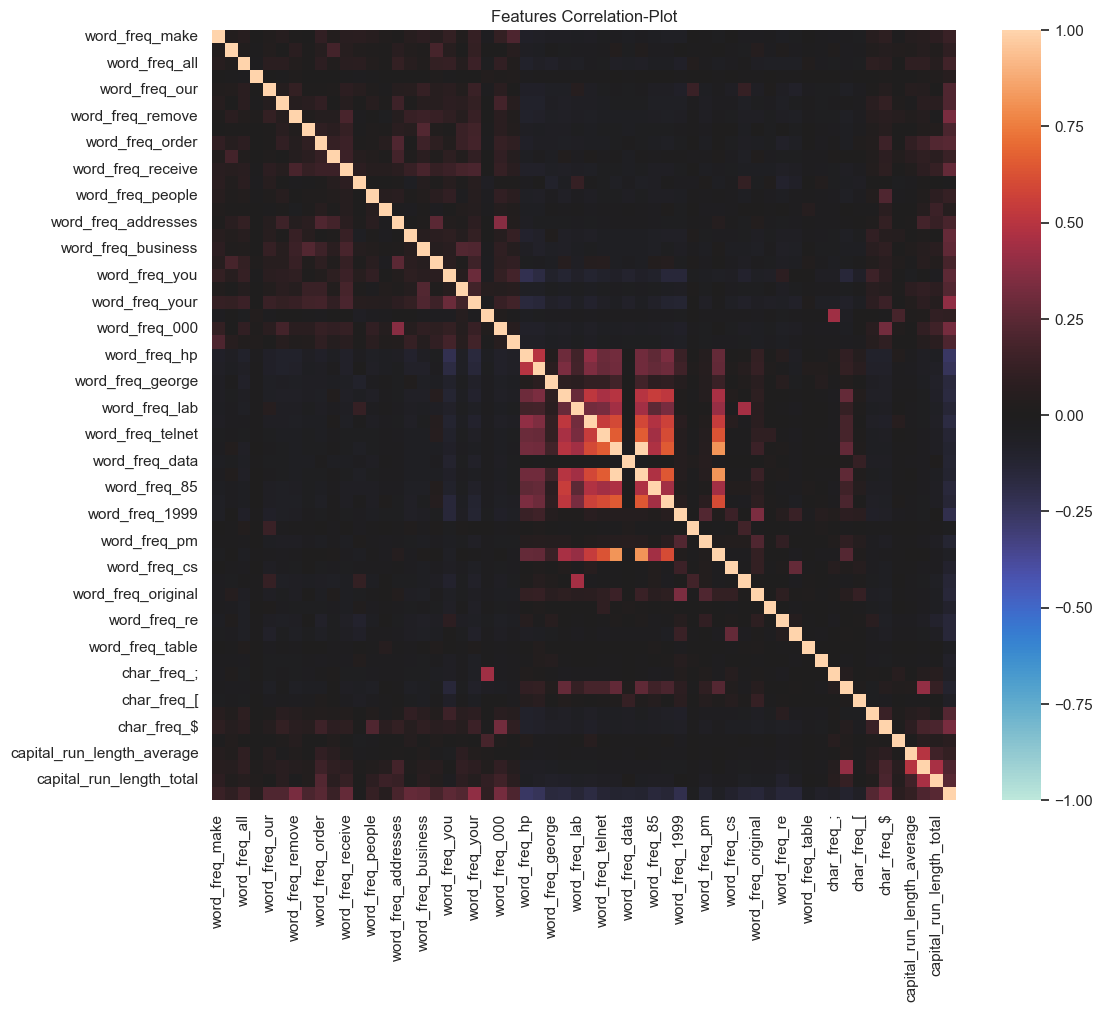

In [306]:
#And for checking the correlation

features = spambase_df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(spambase_df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

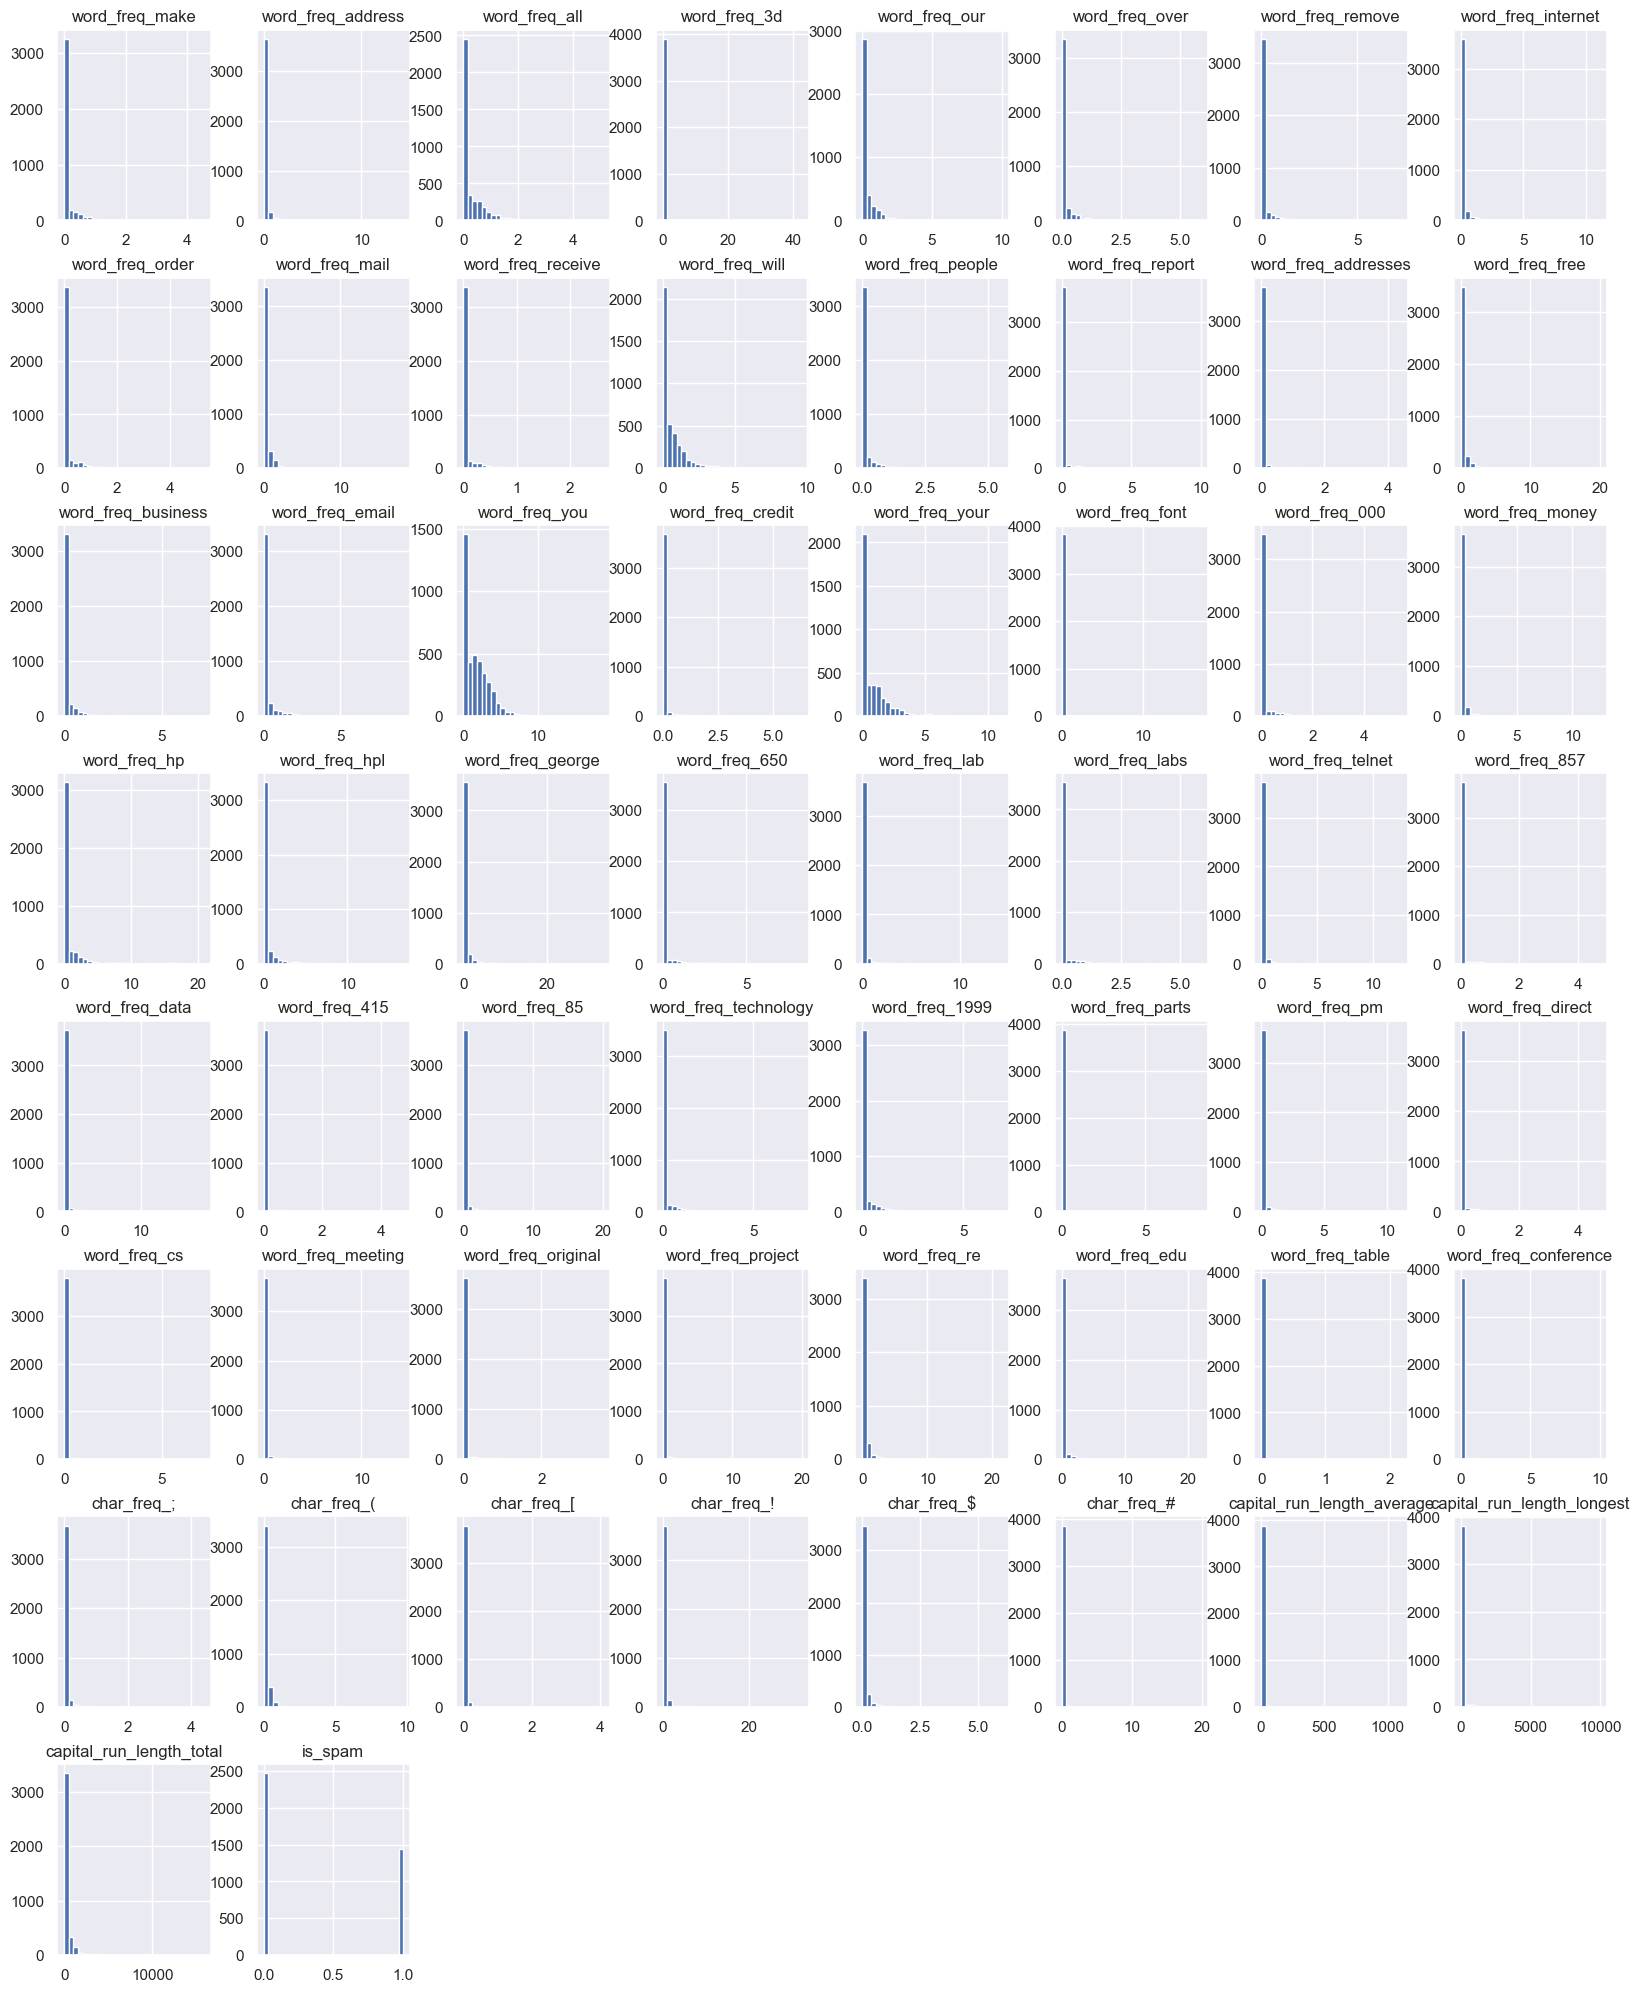

In [308]:
spambase_df.hist(bins=30,figsize=(20,25))
plt.show()

In [328]:
# Split Dataset in features and target variabl

feature_cols = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]
X = spambase_df[feature_cols]               # Features of the dataset
y = spambase_df.is_spam                       # Target variable of the dataset
# Display the X and y arrays
print(X, y)


      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
250             0.00               0.00           0.00           0.0   
251             0.00               0.00           0.00           0.0   
252             0.08               0.16           0.32           0.0   
253             0.48               0.20           0.55           0.0   
254             0.48               0.20           0.55           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
250            0.00            0.00              0.00     

In [330]:
# Display the label variables of binary types
y.value_counts()

is_spam
0    2473
1    1441
Name: count, dtype: int64

In [343]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE 

In [345]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [588]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, 
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


In [590]:
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train, y_train)

# Predict the values
y_pred = lr.predict(X_test)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[ 27,   0],
       [  1, 272]])

In [592]:
# Accuracy and recall based on Logistic regression on imbalanced dataset
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.9966666666666667 0.9963369963369964


In [594]:
# SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [596]:
np.bincount(y_train)

array([675, 675])

In [598]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 24,   1],
       [  0, 225]])

In [600]:
np.bincount(y_train)

array([675, 675])

In [602]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.996 1.0


In [604]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=30),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=30)
}

In [606]:
# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append([name, r2])

# Create a DataFrame to display the results
spambase_df = pd.DataFrame(results, columns=["Model",  "R2 Score"])
print(spambase_df)

               Model  R2 Score
0  Linear Regression  0.502448
1      Decision Tree  0.955556
2      Random Forest  0.999324


In [608]:
# Store results
results = []

# Train and evaluate models using cross-validation for R² Score
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')  # Using R² for scoring
    mean_cv_score = cv_scores.mean()  # Mean R² score
    
    # Train the model on the full dataset for predictions
    model.fit(X, y)
    
    # Store results
    results.append([name, mean_cv_score])

# Create a DataFrame to display the results
spambase_df = pd.DataFrame(results, columns=["Model", "Mean CV R² Score"])
print("\nModel Performance Metrics using Cross-Validation for R² Score:")
print(spambase_df)


Model Performance Metrics using Cross-Validation for R² Score:
               Model  Mean CV R² Score
0  Linear Regression          0.644080
1      Decision Tree          0.951166
2      Random Forest          0.967442



Model Performance Metrics using Cross-Validation for R² Score:
               Model  Mean CV R² Score
0  Linear Regression          0.644080
1      Decision Tree          0.951166
2      Random Forest          0.967442


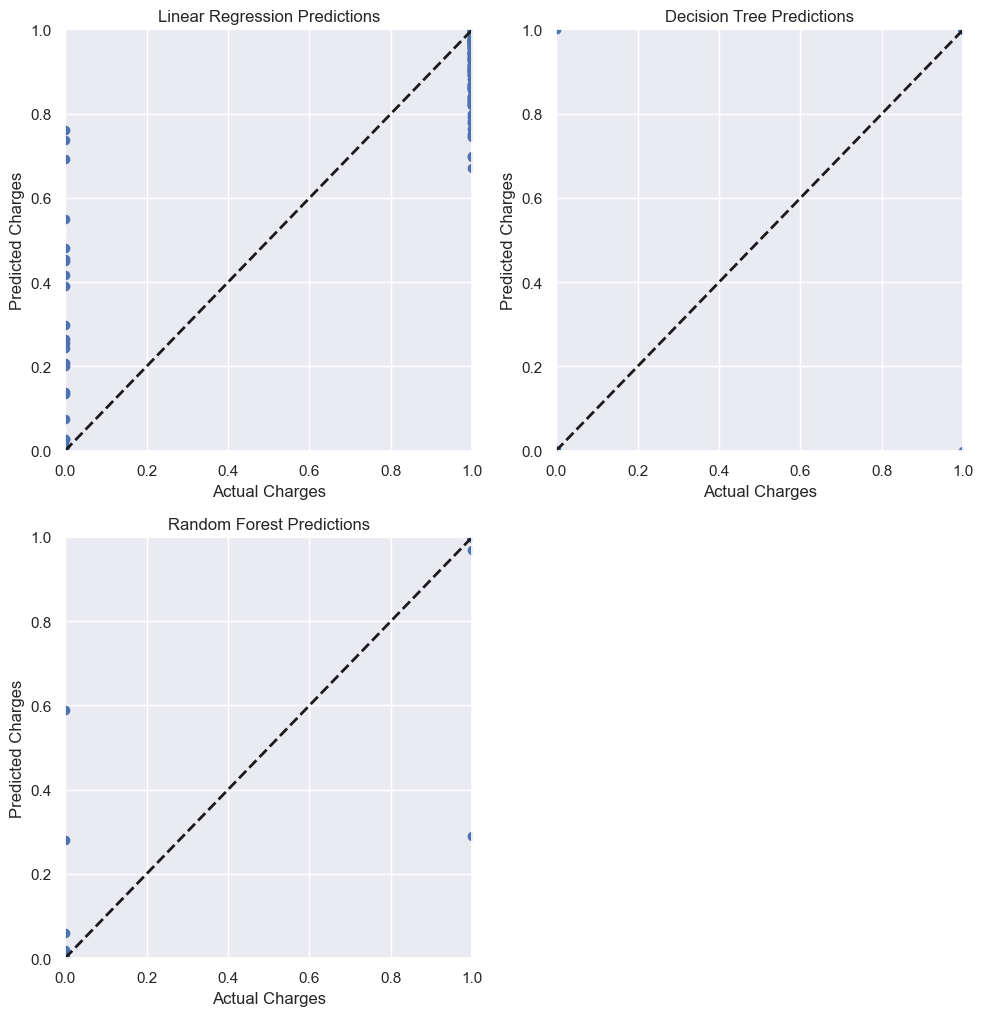

In [609]:
# Create a DataFrame to display the results
spambase_df = pd.DataFrame(results, columns=["Model", "Mean CV R² Score"])
print("\nModel Performance Metrics using Cross-Validation for R² Score:")
print(spambase_df)

# To demonstrate predictions and plot results, let's still split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on the test set for final evaluation
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Plotting actual vs predicted for each model vertically with smaller size
plt.figure(figsize=(10, 20))  # Adjusted size for a more compact vertical layout

for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(4, 2, i + 1)  # 3 rows, 1 column
    plt.scatter(y_test, y_pred, alpha=1.0)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.title(f'{name} Predictions')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()